In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### import datasets

In [2]:
train_full = pd.read_csv('./Data/train.csv')
test_full = pd.read_csv('./Data/test.csv')

In [3]:
test_full_Id = test_full['Id']

In [4]:
train_full.drop("Id", axis=1, inplace=True)
test_full.drop("Id", axis=1, inplace=True)

In [5]:
train_full.shape
test_full.shape

(1459, 79)

In [6]:
train_full.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

### Identification des features qualitatives et quantitatives de train_full

In [7]:
qual = train_full.select_dtypes(include=['object']).columns
print(f"Features Quali:\n {qual}")
quant = train_full.select_dtypes(include=['float64', 'int64']).columns
print(f"Features Quanti:\n {quant}")

Features Quali:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Features Quanti:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfB

### Création d'un dataset de features qualitatives et d'un dataset de features quantitatives à partir de train_full

In [8]:
train_full_quant = train_full[quant]
print(train_full_quant.shape)
train_full_qual = train_full[qual]
print(train_full_qual.shape)

(1460, 37)
(1460, 43)


### Check et remplacement des NA dans la partie quantitative de train_full

In [9]:
print(f"Nombre de NAs dans train_full[quant]: \n {train_full_quant.isna().sum()}")

Nombre de NAs dans train_full[quant]: 
 MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [10]:
train_full_quant = train_full_quant.fillna(0)

In [11]:
print(f"Nombre de NAs dans train_full_quant: \n {train_full_quant.isna().sum()}")

Nombre de NAs dans train_full_quant: 
 MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


### Détection et suppression automatique des outliers des parties quantitatives et qualitatives de train_full

In [12]:
from sklearn.ensemble import IsolationForest

anomalies_ratio = 0.1
clf = IsolationForest(contamination = anomalies_ratio, max_samples = 200, random_state = 42)
clf.fit(train_full_quant)
y_noano = clf.predict(train_full_quant)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train_full_quant = train_full_quant.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_full_quant.reset_index(drop = True, inplace = True)

train_full_qual = train_full_qual.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_full_qual.reset_index(drop = True, inplace = True)

print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train_full_quant.shape[0])

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Number of Outliers: 146
Number of rows without outliers: 1314


C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


### Comptage du nombre de features quantitatives et qualitatives

In [13]:
num_quant_train_full = len(train_full.select_dtypes(include=['int64','float64']).columns)
num_qual_train_full = len(train_full.select_dtypes(include=['object']).columns)

print(f"{num_quant_train_full} features numériques & {num_qual_train_full} features catégorielles")

37 features numériques & 43 features catégorielles


### Matrice de confusion de la partie quantitative de train_full

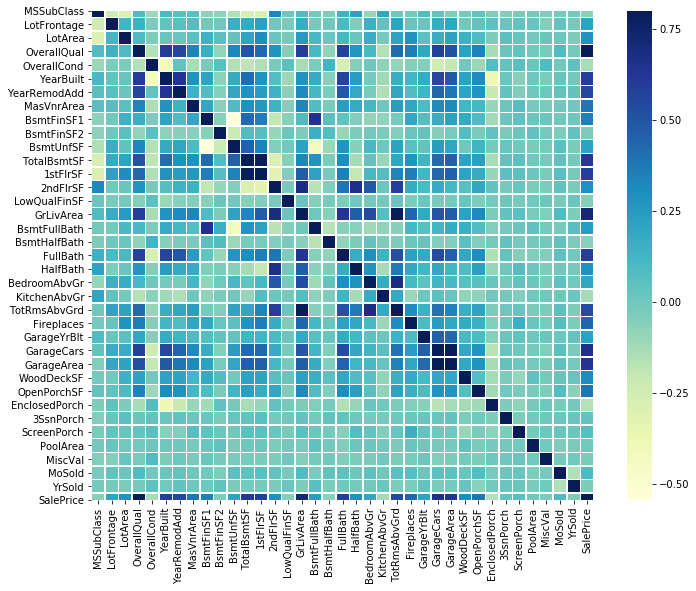

In [14]:
corrmat = train_full_quant.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.5, cmap="YlGnBu");

### Sélection des 10 plus grosses corrélations parmis les features quantitatives

In [15]:
cols = corrmat.nlargest(11,'SalePrice').index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'YearBuilt', 'FullBath', '1stFlrSF', 'YearRemodAdd',
       'TotRmsAbvGrd'],
      dtype='object')

### Matrice de confusion des 10 features quantitatives les plus corrélées

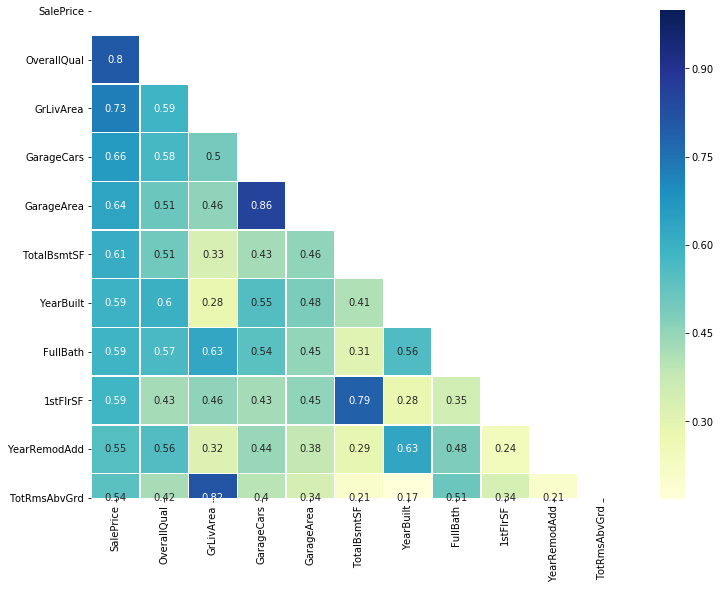

In [16]:
corrmat2 = train_full_quant[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat2));

### Elimination des features quantitatives les plus corrélées entre elles <-- matrice de confusion

In [17]:
train_full_quant.drop(["TotRmsAbvGrd", "GarageCars", "TotalBsmtSF", "GarageYrBlt"], axis=1, inplace=True)

### Matrice de confusion des features quantitatives restantes, puis sélection des 10 plus grosses correlations avec SalePrice

In [18]:
corrmat3 = train_full_quant.corr()
cols3 = corrmat3.nlargest(11,'SalePrice').index
cols3

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt',
       'FullBath', '1stFlrSF', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea',
       'OpenPorchSF'],
      dtype='object')

### Matrice de confusion des 10 features quantitatives sélectionnées

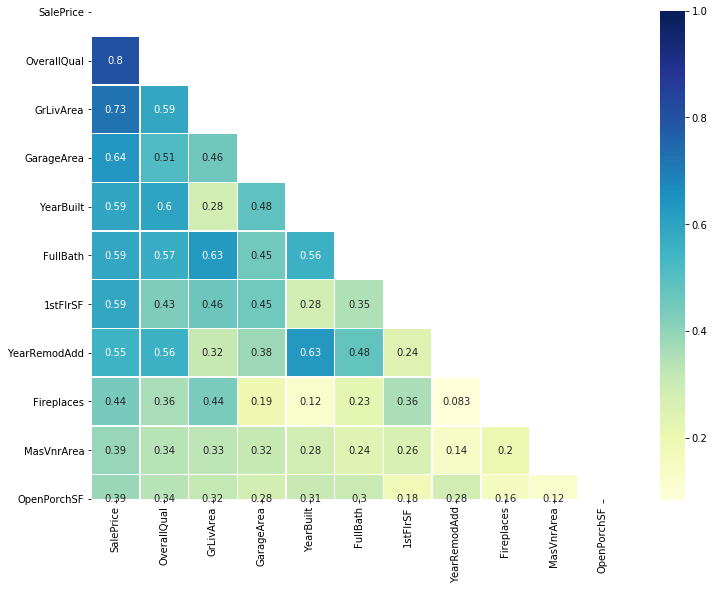

In [19]:
corrmat4 = train_full_quant[cols3].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat4, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat4));

### Affichage des correlations avec SalePrice des 10 features quantitatives sélectionnées

In [20]:
corrmat4['SalePrice']

SalePrice       1.000000
OverallQual     0.803117
GrLivArea       0.725020
GarageArea      0.635267
YearBuilt       0.593849
FullBath        0.589885
1stFlrSF        0.585174
YearRemodAdd    0.550722
Fireplaces      0.438582
MasVnrArea      0.389110
OpenPorchSF     0.385297
Name: SalePrice, dtype: float64

### Sélection des 10 features quantitatives dans train_full

In [21]:
train_full_quant = train_full_quant[cols3]

### Traitement des features quali

In [22]:
print(train_full_quant.shape)
print(train_full_qual.shape)

(1314, 11)
(1314, 43)


### Transformation des features qualitatives en quantitatives

In [23]:
train_full_qual = pd.get_dummies(train_full_qual)
train_full_qual

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1310,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1311,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1312,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
train_full_quant

,SalePrice,OverallQual,GrLivArea,GarageArea,YearBuilt,FullBath,1stFlrSF,YearRemodAdd,Fireplaces,MasVnrArea,OpenPorchSF
0,208500,7,1710,548,2003,2,856,2003,0,196.0,61
1,181500,6,1262,460,1976,2,1262,1976,1,0.0,0
2,223500,7,1786,608,2001,2,920,2002,1,162.0,42
3,140000,7,1717,642,1915,1,961,1970,1,0.0,35
4,250000,8,2198,836,2000,2,1145,2000,1,350.0,84
...,...,...,...,...,...,...,...,...,...,...,...
1309,185000,7,1221,400,2004,2,1221,2005,0,0.0,113
1310,175000,6,1647,460,1999,2,953,2000,1,0.0,40
1311,210000,6,2073,500,1978,2,2073,1988,2,119.0,0
1312,142125,5,1078,240,1950,1,1078,1996,0,0.0,0


### Réunion des features qualittives et quantitatives

In [25]:
train_full_concat = pd.concat([train_full_quant, train_full_qual], axis = 1)
train_full_concat

,SalePrice,OverallQual,GrLivArea,GarageArea,YearBuilt,FullBath,1stFlrSF,YearRemodAdd,Fireplaces,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,7,1710,548,2003,2,856,2003,0,196.0,...,0,0,0,1,0,0,0,0,1,0
1,181500,6,1262,460,1976,2,1262,1976,1,0.0,...,0,0,0,1,0,0,0,0,1,0
2,223500,7,1786,608,2001,2,920,2002,1,162.0,...,0,0,0,1,0,0,0,0,1,0
3,140000,7,1717,642,1915,1,961,1970,1,0.0,...,0,0,0,1,1,0,0,0,0,0
4,250000,8,2198,836,2000,2,1145,2000,1,350.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,185000,7,1221,400,2004,2,1221,2005,0,0.0,...,0,0,0,1,0,0,0,0,1,0
1310,175000,6,1647,460,1999,2,953,2000,1,0.0,...,0,0,0,1,0,0,0,0,1,0
1311,210000,6,2073,500,1978,2,2073,1988,2,119.0,...,0,0,0,1,0,0,0,0,1,0
1312,142125,5,1078,240,1950,1,1078,1996,0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Split du train_full_quant en train et val

In [26]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 42
random.seed(SEED)
train, val= train_test_split(train_full_concat, test_size=0.3)

print("Train full shape: " + str(train_full_concat.shape))
print("Train shape: " + str(train.shape))
print("Val shape: " + str(val.shape))

Train full shape: (1314, 253)
Train shape: (919, 253)
Val shape: (395, 253)


### Séparation de X_train et Y_train sur train et val

In [27]:
target_column = 'SalePrice'
Y_train = train[target_column].values
X_train = train.drop(target_column, axis=1).values
X_val = val.drop(target_column, axis=1).values
Y_val = val[target_column].values

### Normalisation X

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
print(X_train_scaled.shape)

(919, 252)


### Transfo SalePrice en log

In [29]:
Y_train = np.log1p(Y_train)
Y_val = np.log1p(Y_val)

### Normalisation Y

In [30]:
Y_train_reshaped = np.reshape(Y_train, (Y_train.shape[0], 1))
print(Y_train_reshaped.shape)
Y_val_reshaped = np.reshape(Y_val, (Y_val.shape[0], 1))
print(Y_val_reshaped.shape)

(919, 1)
(395, 1)


In [31]:
scaler2 = StandardScaler()
scaler2.fit(Y_train_reshaped)

Y_train_scaled = scaler2.transform(Y_train_reshaped)
Y_val_scaled = scaler2.transform(Y_val_reshaped)

### Initialisation modèle Sequential

In [36]:
from tensorflow.keras.models import Sequential
model = Sequential()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-a90a014d97c3>", line 1, in <module>
    from tensorflow.keras.models import Sequential
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 44, in _load
    module = _importlib.import_module(self.__name__)
  File "C:\Users\utilisateur\Anaconda3\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow_core\__init__.py", line 45, in <module>
    from . _api.v2 import compat
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow_core\_api\v2\

ImportError: cannot import name 'Layer' from 'tensorflow.python.keras.engine.base_layer' (C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py)

### Création et entrainement du modèle

In [35]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

model.add(Input(shape=X_train_scaled.shape[1]))
model.add(Dense(504, activation='elu'))
model.add(Dense(504, activation='elu'))
model.add(Dense(252, activation='elu'))
model.add(Dense(126, activation='elu'))
model.add(Dense(1, activation='elu'))
loss = 'mse'
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))
BATCH_SIZE = X_train_scaled.shape[0]
EPOCHS = 5000
history = model.fit(X_train_scaled, Y_train_scaled, validation_data=(X_val_scaled, Y_val_scaled), epochs=EPOCHS, batch_size=BATCH_SIZE)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-c1d76875ba85>", line 1, in <module>
    from tensorflow.keras.layers import Input
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 44, in _load
    module = _importlib.import_module(self.__name__)
  File "C:\Users\utilisateur\Anaconda3\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow_core\__init__.py", line 45, in <module>
    from . _api.v2 import compat
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow_core\_api\v2\compa

ImportError: cannot import name 'Layer' from 'tensorflow.python.keras.engine.base_layer' (C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py)

In [ ]:
model.summary()

### Affichage de la performance du modèle sur train et val

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

### Prédiction sur X_val

In [ ]:
predict = model.predict(X_val_scaled)

### Calcul de l'erreur sur la prédiction (MSE)

In [ ]:
predict = scaler2.inverse_transform(predict)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_val, predict))
print(rmse)

### Reconversion du SalePrice

In [ ]:
predict  = np.e**predict

### Choix des colonnes sur le test_full

Supression de SalePrice de la liste des features quantitatives issue de train_full

In [ ]:
cols3 = cols3.drop("SalePrice")
cols3

In [ ]:
qual

### Séparation des colonnes des features quantitatives et qualitatives de test_full

In [ ]:
test_quant = test_full[cols3]
#print(test_quant)
test_qual = test_full[qual]
print(test_qual)

In [ ]:
train_full_qual.shape, test_qual.shape

### Transformation des features qualitatives de test en quantitatives

In [ ]:
test_qual = pd.get_dummies(test_qual)

In [ ]:
test_qual.head()

### Identification des colonnes manquantes entre les parties qualitatives transformées de train et test, et mise en forme de celle de test

In [ ]:
missing_cols = set( train_full_qual.columns ) - set( test_qual.columns )
for c in missing_cols:
    test_qual[c] = 0
test_qual = test_qual[train_full_qual.columns]

In [ ]:
test_qual

### Check et remplacement des NA de la partie quantitative de test_full

In [ ]:
test_quant.isna().sum()
test_quant = test_quant.fillna(0)

In [ ]:
test_quant.isna().sum()

### Réunion des parties quantitatives et qualitatives transformées de test_full

In [ ]:
test = pd.concat([test_quant, test_qual], axis = 1)

In [ ]:
test

### Standardisation des données de test_full

In [ ]:
test_scaled = scaler.transform(test)

### Application du modèle entrainé sur le train à la prédiction sur le test

In [ ]:
predict_test = model.predict(test_scaled)

### Unscale et unlog des prédictions sur le test

In [ ]:
predict_test = scaler2.inverse_transform(predict_test)
predict_test  = np.e**predict_test

### Mise en forme des prédictions en vue de la soumission à Kaggle

In [ ]:
from pandas import DataFrame
df = DataFrame(data=predict_test, index=test_full_Id)

df


In [ ]:
df.columns = ['SalePrice']
#df = df.rename(columns={"":"SalePrice"})
df

### Création du csv de prédictions àenvoyer à Kaggle

In [ ]:
df.to_csv('prediction_quanti_quali.csv')